In [361]:
#
#
# Scatter plot
#
#

In [362]:
# Packages

# data handling
import numpy as np
import pandas as pd
from scipy import stats

# plotting
import matplotlib.pyplot as plt
import matplotlib.cm as mpl
%matplotlib inline

import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.colors as colors


# paths and loading
import os
from scipy.io import loadmat

In [363]:
# choose variables
data_path = '/Users/cbla0002/Documents/data'

# all
percentiles= ['95th_percentile', '97th_percentile', '99th_percentile']
var_files= ['domain', 'convective_objects', 'aggregation_index', 'examples']
insts = ['IPSL','NOAA-GFDL','NASA-GISS','BCC','CNRM-CERFACS','NCAR'
        ,'NIMR-KMA','BNU','ICHEC','LASG-CESS','MPI-M','CMCC','INM','NCC' 
        ,'CCCma','MIROC','MOHC','MRI','NSF-DOE-NCAR']
vars= ['pr','hus','tas','convective_objects','aggregation_index']
scenarios= ['historical', 'rcp85']


# chosen
percentile= ['97th_percentile']
var_file= ['domain', 'aggregation_index','tas']
inst = ['IPSL']
var= ['pr', 'aggregation_index','tas']
scenario= ['historical','rcp85']



In [364]:
# check variables (domain_pr)
fileName = inst[0] + '_' + var_file[0] + '_' + var[0] + '_' + scenario[0] 
#print(fileName)

file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[0], fileName))
#print(file_path)

data1 = loadmat(file_path)
print(data1.keys())

dict_keys(['__header__', '__version__', '__globals__', 'M_area', 'M_lat', 'M_lon', 'Rx1day_pr', 'Rx1day_pr_annual', 'Rx1day_pr_image', 'Rx5day_pr', 'Rx5day_pr_annual', 'Rx5day_pr_image', 'Wlat', 'Wlon', 'area_prctile', 'day_of_snapshot', 'gridbox_5day_pr', 'gridbox_pr', 'lat', 'lat_old', 'lon', 'lon_old', 'mean_pr_image', 'mean_pr_prctile_rate', 'mean_pr_prctile_vol', 'mean_pr_vol', 'prctile_rate_99', 'prctile_rate_99_9', 'prctile_rate_99_99', 'snapshot_pr_image', 'time_range', 'trop_end', 'trop_start'])


In [365]:
# check variables (aggregation_index)
fileName = inst[0] + '_' + var[1] + '_' + scenario[0] 
#print(fileName)

file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[1], fileName))
#print(file_path)

data2 = loadmat(file_path)
print(data2.keys())

dict_keys(['__header__', '__version__', '__globals__', 'COP', 'COP_n', 'Number_index', 'Number_index_n', 'ROME', 'ROME_n', 'SCAI', 'SCAI_n'])


In [366]:
# check variables (tas)
fileName = inst[0]+ '_' + var_file[0] + '_' +var[2] + '_' + scenario[0] 
#print(fileName)

file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[2], fileName))
#print(file_path)

data3 = loadmat(file_path)
print(data3.keys())

dict_keys(['__header__', '__version__', '__globals__', 'M_area', 'Mean_tas_image', 'Mean_trop_tas', 'lat', 'lon', 'month_snapshot', 'snapshot_trop_tas_image'])


In [367]:
# creating lists of precipitation extremes, aggregation level, and temperature for each model

y= np.zeros(len(insts))
x= np.zeros(len(insts))
T= np.zeros(len(insts))

for i in np.arange(0,len(insts),1):
    # precipitaiton extremes
    fileName = insts[i] + '_' + var_file[0] + '_' + var[0] + '_' + scenario[0] 
    file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[0], fileName))
    data = loadmat(file_path)
    y[i]= np.squeeze(data['Rx1day_pr'])

    # aggregation
    fileName = insts[i] + '_' + var[1] + '_' + scenario[0] 
    file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[1], fileName))
    data = loadmat(file_path)
    x[i]= np.mean(np.squeeze(data['ROME']))

    # temperature
    fileName = insts[i]+ '_' + var_file[0] + '_' +var[2] + '_' + scenario[0] 
    file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[2], fileName))
    data = loadmat(file_path)
    T[i]= np.squeeze(data['Mean_trop_tas'])
    

Text(0, 0.5, 'pr (mm/day)')

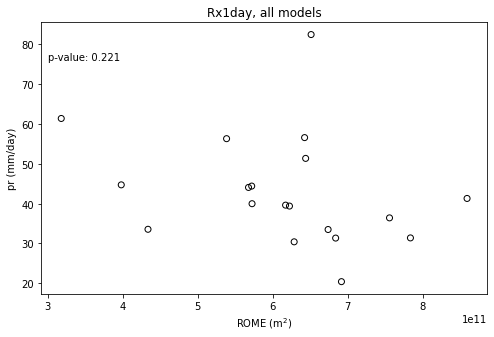

In [368]:
# plot correlation (climatology)
fig = plt.figure(figsize=(8,5))
plt.scatter(x,y,facecolors='none', edgecolor='k')

res= stats.pearsonr(x,y)
#plt.text(3.35e11, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
plt.text(3e11, 76,'p-value: '+ str(round(res[1],3)),fontsize=10)

plt.title('Rx1day, all models')
plt.xlabel('ROME (m$^2$)')
plt.ylabel('pr (mm/day)')



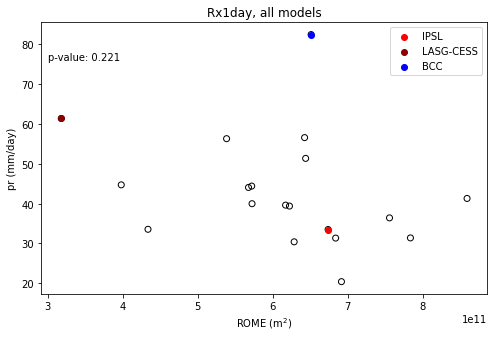

In [369]:
# plot correlation (highlight models)
fig = plt.figure(figsize=(8,5))
plt.scatter(x,y,facecolors='none', edgecolor='k')

res= stats.pearsonr(x,y)
#plt.text(3.35e11, 80,'R$^2$: '+ str(round(res[0]**2,3)),fontsize=10)
plt.text(3e11, 76,'p-value: '+ str(round(res[1],3)),fontsize=10)


x_leg = [insts.index('IPSL'),insts.index('LASG-CESS'),insts.index('BCC')]
label = ['IPSL','LASG-CESS','BCC']
colors = ['r','darkred','b']
j=0
for i in x_leg:
    plt.scatter(x[i],y[i],c=colors[j], label=label[j])
    j+=1

plt.title('Rx1day, all models')
plt.xlabel('ROME (m$^2$)')
plt.ylabel('pr (mm/day)')
plt.legend()

In [370]:
# creating lists of precipitation extremes, aggregation level, and temperature for each model (rcp85-historical)

yrcp= np.zeros(len(insts))
xrcp= np.zeros(len(insts))
Trcp= np.zeros(len(insts))

for i in np.arange(0,len(insts),1):
    # precipitaiton extremes
    fileName = insts[i] + '_' + var_file[0] + '_' + var[0] + '_' + scenario[1] 
    file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[0], fileName))
    data = loadmat(file_path)
    yrcp[i]= np.squeeze(data['Rx1day_pr'])

    # aggregation
    fileName = insts[i] + '_' + var[1] + '_' + scenario[1] 
    file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[1], fileName))
    data = loadmat(file_path)
    xrcp[i]= np.mean(np.squeeze(data['ROME']))

    # temperature
    fileName = insts[i]+ '_' + var_file[0] + '_' +var[2] + '_' + scenario[1] 
    file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[2], fileName))
    data = loadmat(file_path)
    Trcp[i]= np.squeeze(data['Mean_trop_tas'])

Tdiff = Trcp-T
ydiff = (yrcp-y)/Tdiff
xdiff= (xrcp-x)/Tdiff


Text(0, 0.5, 'pr (mm/day)')

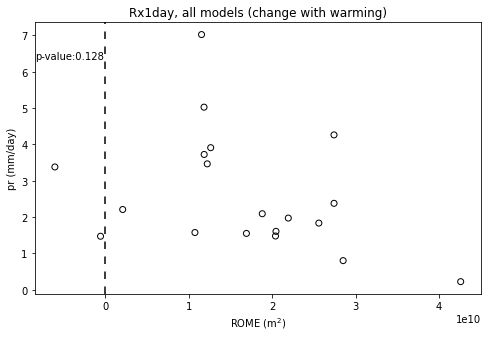

In [371]:
# plot correlation (changes with warming)
fig = plt.figure(figsize=(8,5))
plt.scatter(xdiff,ydiff,facecolors='none', edgecolor='k')
plt.axvline(0, color='k',linestyle= (0, (5, 5)))

res= stats.pearsonr(xdiff,ydiff)
#plt.text(-0.545e10, 6.75,'R$^2$:'+ str(round(res[0]**2,3)),fontsize=10)
plt.text(-0.845e10, 6.35,'p-value:'+ str(round(res[1],3)),fontsize=10)

plt.title('Rx1day, all models (change with warming)')
plt.xlabel('ROME (m$^2$)')
plt.ylabel('pr (mm/day)')

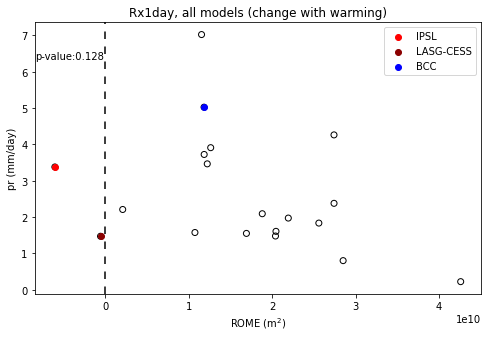

In [372]:
# plot correlation (highlight models)
fig = plt.figure(figsize=(8,5))
plt.scatter(xdiff,ydiff,facecolors='none', edgecolor='k')
plt.axvline(0, color='k',linestyle= (0, (5, 5)))

res= stats.pearsonr(xdiff,ydiff)
#plt.text(-0.545e10, 6.75,'R$^2$:'+ str(round(res[0]**2,3)),fontsize=10)
plt.text(-0.845e10, 6.35,'p-value:'+ str(round(res[1],3)),fontsize=10)


x_leg = [insts.index('IPSL'),insts.index('LASG-CESS'),insts.index('BCC')]
label = ['IPSL','LASG-CESS','BCC']
colors = ['r','darkred','b']

j=0
for i in x_leg:
    plt.scatter(xdiff[i],ydiff[i],c=colors[j], label=label[j])
    j=j+1

plt.title('Rx1day, all models (change with warming)')
plt.xlabel('ROME (m$^2$)')
plt.ylabel('pr (mm/day)')
plt.legend()

Text(0, 0.5, 'pr (mm/day)')

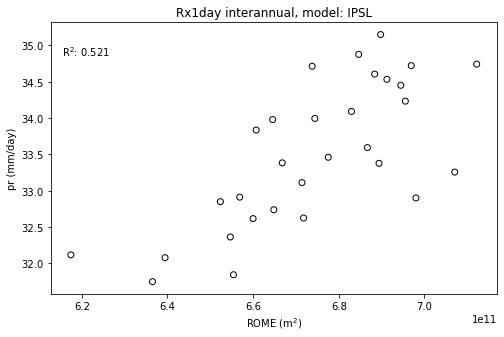

In [381]:
# plot interannual correlation (one model)
y = np.squeeze(data1['Rx1day_pr_annual'])
x = np.squeeze(data2['ROME'])
year = np.linspace(1,len(x),31,dtype=int)
x_year= np.zeros(30)

for i in np.arange(0,len(x_year),1):
    x_year[i]= np.mean(x[year[i]:year[i+1]])

fig = plt.figure(figsize=(8,5))
plt.scatter(x_year,y,facecolors='none', edgecolor='k')

res= stats.pearsonr(x_year,y)
plt.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.025, 0.875), textcoords='axes fraction')
#plt.text(6.1425e11, 34.85,'p-value:'+ str(round(res[1],10)),fontsize=10)

plt.title('Rx1day interannual, model: IPSL')
plt.xlabel('ROME (m$^2$)')
plt.ylabel('pr (mm/day)')

 

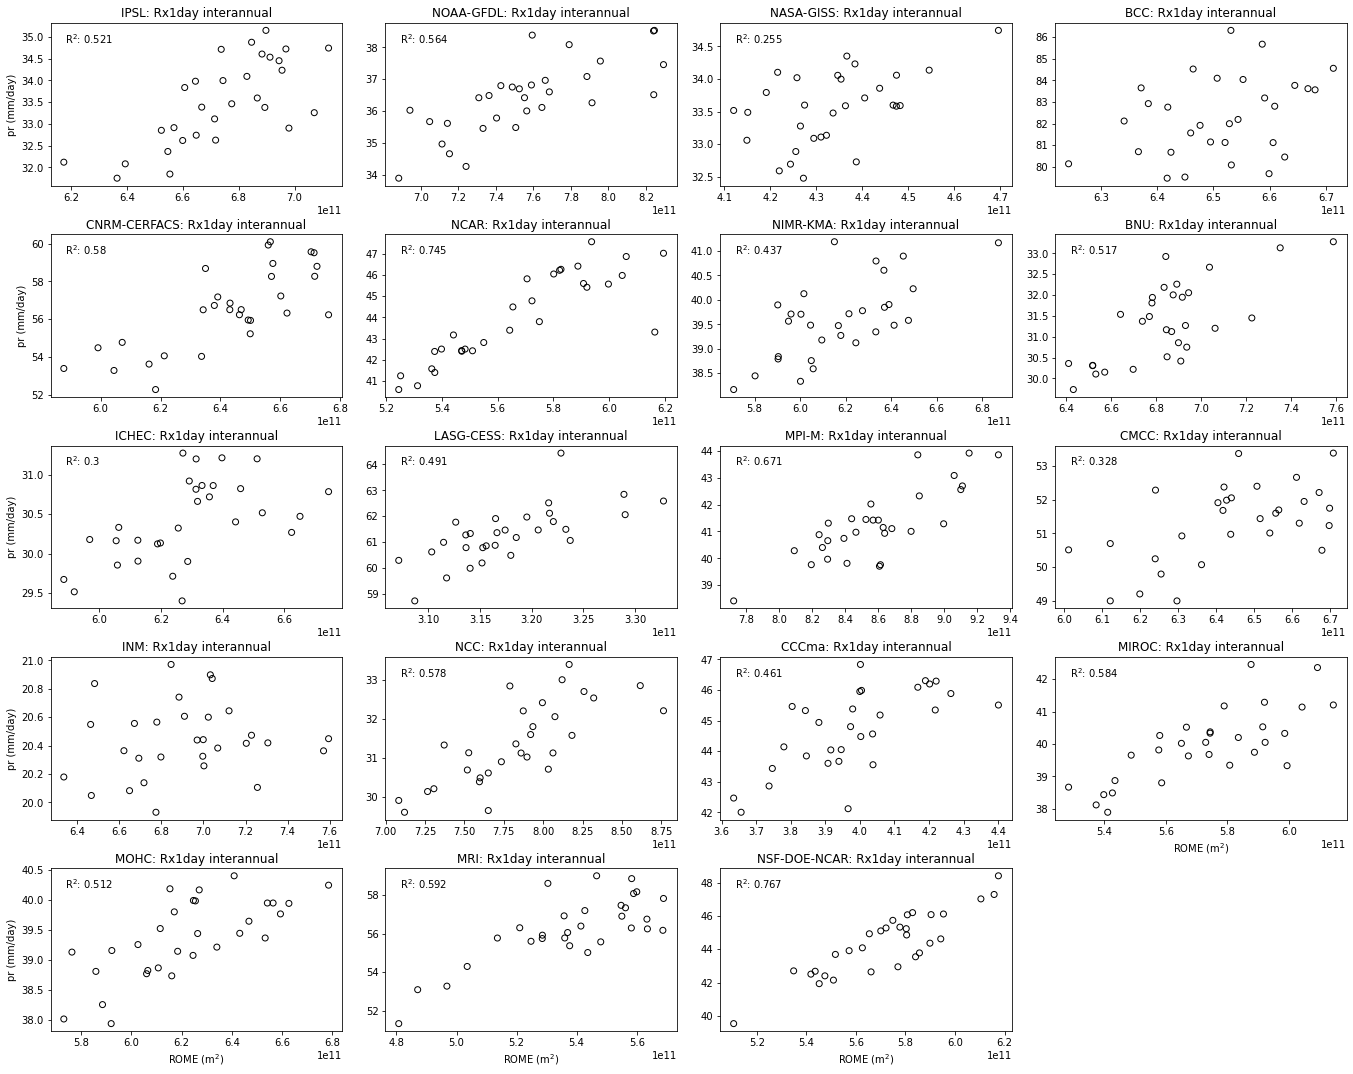

In [386]:
# plot interannual correlation (all models)

fig= plt.figure(figsize=(22.5,17.5))


for i in np.arange(0,19,1):
    ax= fig.add_subplot(5,4,i+1)

    # precipitaiton extremes
    fileName = insts[i] + '_' + var_file[0] + '_' + var[0] + '_' + scenario[0] 
    file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[0], fileName))
    data = loadmat(file_path)
    y= np.squeeze(data['Rx1day_pr_annual'])

    # aggregation
    fileName = insts[i] + '_' + var[1] + '_' + scenario[0] 
    file_path = os.path.abspath(os.path.join(data_path, percentile[0], var_file[1], fileName))
    data = loadmat(file_path)
    x= np.squeeze(data['ROME'])
    
    year = np.linspace(1,len(x),31,dtype=int)
    x_year= np.zeros(30)

    for j in np.arange(0,len(x_year),1):
        x_year[j]= np.mean(x[year[j]:year[j+1]])

    plt.scatter(x_year,y,facecolors='none', edgecolor='k')

    #ax.spines.right.set_visible(False)
    #ax.spines.top.set_visible(False)

    res= stats.pearsonr(x_year,y)

    if res[1]<=0.05:
        ax.annotate('R$^2$: '+ str(round(res[0]**2,3)), xy=(0.2, 0.1), xycoords='axes fraction', xytext=(0.05, 0.875), textcoords='axes fraction')


    plt.title(insts[i] + ': Rx1day interannual' )

    if i== 0 or i==4 or i==8 or i==12 or i==16:
        plt.ylabel('pr (mm/day)')


    if i>=15:
        plt.xlabel('ROME (m$^2$)')


plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.15, hspace=0.3)
#sns.despine(top=True, right=True, left=False, bottom=False)



In [376]:
a=np.arange(1,10,1)
b= np.amax(a)
print(b)

9
